In [1]:
#importing all the libraries
from typing import Iterable, List, Dict, Callable
import os
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
PATH_TO_DATA = "./archive/"
NUMBER_OF_PROFILES = 2205
PROFILE_MAX_SAMPLE_RATE = 6000
TARGET_NAMES = ["cooler", "valve", "leakage", "accumulator", "stable"]

PLOT_STYLE = "darkgrid"

In [10]:
TARGET_VALUES_MAP = {
    "cooler": {
        3: "close to total failure",
        20: "reduced effifiency",
        100: "full efficiency",
    },
    "valve": {
        100:"optimal switching behavior",
        90: "small lag",
        80: "severe lag",
        73: "close to total failure",
    }, 
    "leakage": {
        0: "no",
	    1: "weak",
	    2: "severe",
    },
    "accumulator": {
        130: "optimal pressure",
    	115: "slightly reduced pressure",
	    100: "severely reduced pressure",
	    90:  "close to total failure",
     },
     "stable":{
        0: "yes",
	    1: "not",
     }
}

In [11]:
#Load data

sersor_files_config = [
    {"name": "CE", "upsample_coeff": 100},
    {"name": "CP", "upsample_coeff": 100},
    {"name": "EPS1", "upsample_coeff": 1},
    {"name": "FS1", "upsample_coeff": 10},
    {"name": "FS2", "upsample_coeff": 10},
    {"name": "PS1", "upsample_coeff": 1},
    {"name": "PS2", "upsample_coeff": 1},
    {"name": "PS3", "upsample_coeff": 1},
    {"name": "PS4", "upsample_coeff": 1},
    {"name": "PS5", "upsample_coeff": 1},
    {"name": "PS6", "upsample_coeff": 1},
    {"name": "SE", "upsample_coeff": 100},
    {"name": "TS1", "upsample_coeff": 100},
    {"name": "TS2", "upsample_coeff": 100},
    {"name": "TS3", "upsample_coeff": 100},
    {"name": "TS4", "upsample_coeff": 100},
    {"name": "VS1", "upsample_coeff": 100},
]

In [12]:
def get_files_with_resample(config: List[Dict]) -> Iterable[np.ndarray]:
    for file in config:
        data = np.genfromtxt(PATH_TO_DATA + file["name"] + ".txt", dtype=float, delimiter='\t')
        yield np.repeat(data, file["upsample_coeff"], axis=1).flatten()

In [13]:
def load_feature_dataframe(config: List[Dict]) -> pd.DataFrame:
    columns = [file["name"] for file in config]
    data = np.stack(get_files_with_resample(config), axis=-1)
    data_df = pd.DataFrame(data, columns=columns)

    prodile_ids = np.repeat(range(1, NUMBER_OF_PROFILES+1), PROFILE_MAX_SAMPLE_RATE)
    prodile_ids_df = pd.DataFrame(prodile_ids, columns=["profile_id"])

    return pd.concat([prodile_ids_df, data_df], axis=1, sort=False)

In [14]:
def load_targets(filename: str) -> pd.DataFrame:
    conditions_data = np.genfromtxt(PATH_TO_DATA + filename, dtype=int, delimiter='\t')
    conditions_df = pd.DataFrame(conditions_data, columns=TARGET_NAMES)

    prodile_ids = range(1, NUMBER_OF_PROFILES+1)
    prodile_ids_df = pd.DataFrame(prodile_ids, columns=["profile_id"])

    return pd.concat([prodile_ids_df, conditions_df], axis=1, sort=False)

In [15]:
feature_df = load_feature_dataframe(sersor_files_config)
target_df = load_targets("profile.txt") #Note that targets is define for profile, not to points

_ = gc.collect()

/Users/jasneetsawhney/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
#Basic EDA
feature_df.head()


,profile_id,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
0,1,47.202,2.184,2411.6,8.99,10.179,151.47,125.50,2.305,0.0,9.936,9.818,68.039,35.57,40.961,38.32,30.363,0.604
1,1,47.202,2.184,2411.6,8.99,10.179,151.45,125.39,2.305,0.0,9.947,9.823,68.039,35.57,40.961,38.32,30.363,0.604
2,1,47.202,2.184,2411.6,8.99,10.179,151.52,125.40,2.336,0.0,9.964,9.844,68.039,35.57,40.961,38.32,30.363,0.604
3,1,47.202,2.184,2411.6,8.99,10.179,151.27,125.03,2.578,0.0,9.989,9.861,68.039,35.57,40.961,38.32,30.363,0.604
4,1,47.202,2.184,2411.6,8.99,10.179,150.80,124.05,2.977,0.0,9.996,9.877,68.039,35.57,40.961,38.32,30.363,0.604


In [18]:
feature_df.tail()

,profile_id,CE,CP,EPS1,FS1,FS2,PS1,PS2,PS3,PS4,PS5,PS6,SE,TS1,TS2,TS3,TS4,VS1
13229995,2205,46.621,2.148,2416.2,7.774,10.176,151.64,125.73,2.305,10.204,9.989,9.870,68.117,35.426,40.891,38.187,30.375,0.531
13229996,2205,46.621,2.148,2416.6,7.774,10.176,151.70,125.81,2.320,10.238,10.007,9.882,68.117,35.426,40.891,38.187,30.375,0.531
13229997,2205,46.621,2.148,2416.8,7.774,10.176,151.73,125.77,2.273,10.223,10.007,9.886,68.117,35.426,40.891,38.187,30.375,0.531
13229998,2205,46.621,2.148,2417.0,7.774,10.176,151.71,125.66,2.227,10.218,9.988,9.870,68.117,35.426,40.891,38.187,30.375,0.531
13229999,2205,46.621,2.148,2417.0,7.774,10.176,151.70,125.77,2.250,10.212,9.964,9.854,68.117,35.426,40.891,38.187,30.375,0.531


In [19]:
target_df.head()

,profile_id,cooler,valve,leakage,accumulator,stable
0,1,3,100,0,130,1
1,2,3,100,0,130,1
2,3,3,100,0,130,1
3,4,3,100,0,130,1
4,5,3,100,0,130,1


In [20]:
target_df.tail()

,profile_id,cooler,valve,leakage,accumulator,stable
2200,2201,100,100,0,90,0
2201,2202,100,100,0,90,0
2202,2203,100,100,0,90,0
2203,2204,100,100,0,90,0
2204,2205,100,100,0,90,0


In [21]:
def generate_encoder(target_labels: Dict[str, Dict[int, str]], feature_name: str) -> Callable:
    encodes = target_labels[feature_name]

    def encode(value: int) -> str:
        return encodes[value]
    
    return encode

In [22]:
def plot_profile(df: pd.DataFrame, target_df: pd.DataFrame, profile_id: int, features: List[str] = []):
    filtered_df = df[features][df.profile_id == profile_id].reset_index()

    profile_target_values = target_df[target_df.profile_id == profile_id][TARGET_NAMES].to_dict("records")[0]
    profile_target_labels = [f"{k}: {generate_encoder(TARGET_VALUES_MAP, k)(v)}" for k, v in profile_target_values.items()]

    with sns.axes_style(PLOT_STYLE):
        figure, axes = plt.subplots(len(features), 1, figsize=(15, len(features)*2), sharex=True)
        figure.suptitle(f'{", ".join(profile_target_labels)}', fontsize=14)
        plt.xlabel("sample")

        for ax, feature_name in zip(axes, features):
            ax.plot(filtered_df[feature_name])
            ax.set_ylabel(feature_name)

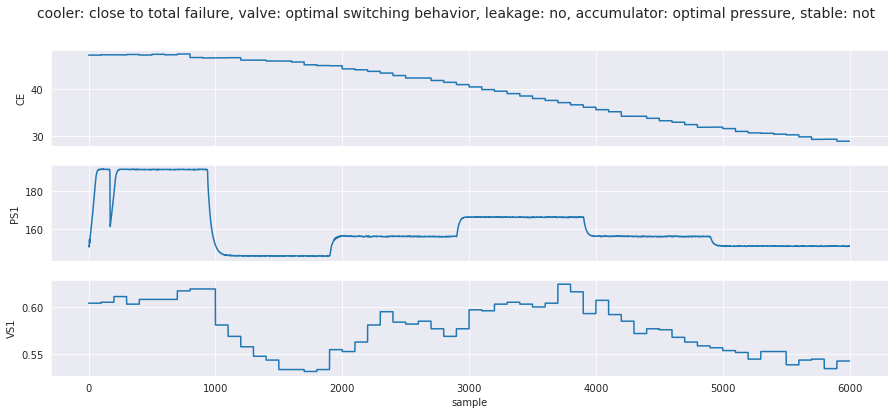

In [23]:
plot_profile(feature_df, profile_id=1, target_df=target_df, features=["CE", "PS1", "VS1"])

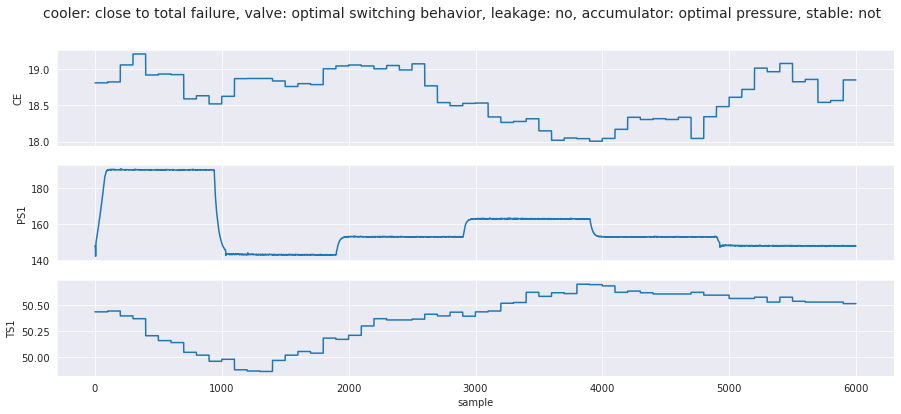

In [24]:
plot_profile(feature_df, profile_id=35, target_df=target_df, features=["CE", "PS1", "TS1"])

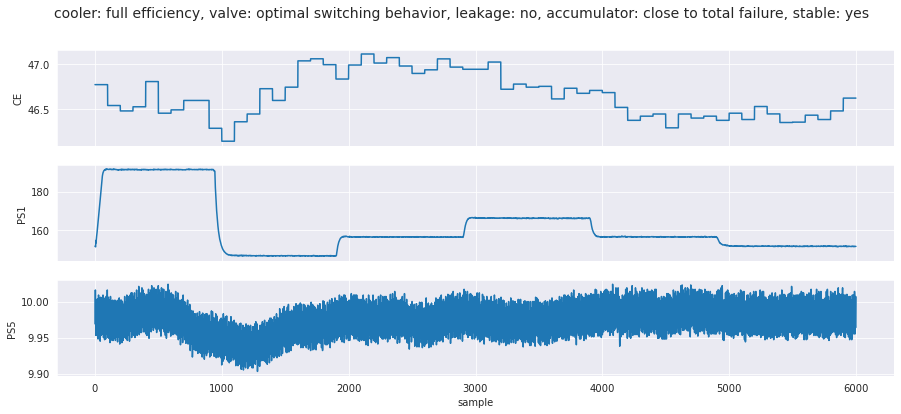

In [25]:
plot_profile(feature_df, profile_id=2205, target_df=target_df, features=["CE", "PS1", "PS5"])

In [26]:
def count_targets(df: pd.DataFrame):
    for target in TARGET_NAMES:
        encoder = generate_encoder(TARGET_VALUES_MAP, target)
        data = df[target].map(encoder)
        print(f"Distribution of '{target}' target:\n{data.value_counts()}\n")

In [27]:
count_targets(target_df)

Distribution of 'cooler' target:
full efficiency           741
close to total failure    732
reduced effifiency        732
Name: cooler, dtype: int64

Distribution of 'valve' target:
optimal switching behavior    1125
close to total failure         360
severe lag                     360
small lag                      360
Name: valve, dtype: int64

Distribution of 'leakage' target:
no        1221
severe     492
weak       492
Name: leakage, dtype: int64

Distribution of 'accumulator' target:
close to total failure       808
optimal pressure             599
slightly reduced pressure    399
severely reduced pressure    399
Name: accumulator, dtype: int64

Distribution of 'stable' target:
yes    1449
not     756
Name: stable, dtype: int64

